In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

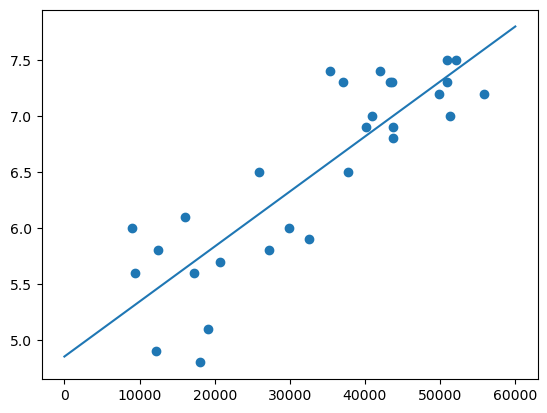

[[5.96242338]
 [7.30882509]]


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv("Dataset/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("Dataset/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
plt.scatter(X, y)

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)
plt.plot([0, 60000], [model.predict([[0]])[0][0], model.predict([[60000]])[0][0]])
plt.show()

# Make a prediction for Cyprus
X_new = [[22587], [50000]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]